In [94]:
import pandas as pd
import numpy as np
import pylab as pl

df = pd.read_csv("/home/drproduck/Downloads/creditcard.csv")
print(df.tail())

            Time         V1         V2        V3        V4        V5  \
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...         V21       V22  \
284802 -2.606837 -4.918215  7.305334  1.914428  ...    0.213454  0.111864   
284803  1.058415  0.024330  0.294869  0.584800  ...    0.214205  0.924384   
284804  3.031260 -0.296827  0.708417  0.432454  ...    0.232045  0.578229   
284805  0.623708 -0.686180  0.679145  0.392087  ...    0.265245  0.800049   
284806 -0.649617  1.577006 -0.414650  0.486180  ...    0.261057  0.643078   

             V23       V24       V25       V26       V27       V28  Amount  \
284802  1.014480 -0.509348

In [95]:
grouped_taget = df.groupby(by='Class', sort=False)
print(grouped_taget.agg([np.min, np.max]))

        Time                  V1                   V2                    V3  \
        amin      amax      amin      amax       amin       amax       amin   
Class                                                                         
0        0.0  172792.0 -56.40751  2.454930 -72.715728  18.902453 -48.325589   
1      406.0  170348.0 -30.55238  2.132386  -8.402154  22.057729 -31.103685   

                       V4               ...           V25                 V26  \
           amax      amin       amax    ...          amin      amax      amin   
Class                                   ...                                     
0      9.382558 -5.683171  16.875344    ...    -10.295397  7.519589 -2.604551   
1      2.250210 -1.313275  12.114672    ...     -4.781606  2.208209 -1.152671   

                       V27                   V28            Amount            
           amax       amin       amax       amin       amax   amin      amax  
Class                                   

col_0       0    1
Class             
0      284315    0
1          25  467


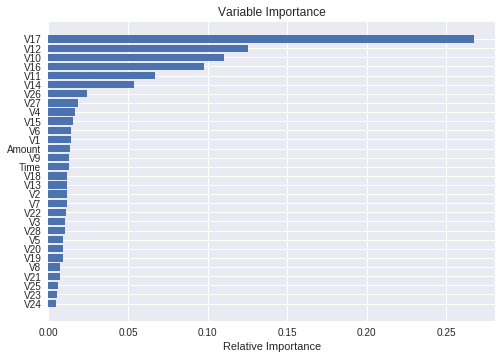

In [106]:
from sklearn import ensemble

ju = ensemble.RandomForestClassifier()
ju.fit(df.iloc[:, 0:30], df.Class)
print(pd.crosstab(df.Class, ju.predict(df.iloc[:, 0:30])))
importances = ju.feature_importances_
sorted_idx = np.argsort(importances)

padding = np.arange(30) + 2
pl.barh(padding, importances[sorted_idx], align='center')
pl.yticks(padding, df.columns[sorted_idx])
pl.xlabel("Relative Importance")
pl.title("Variable Importance")
pl.show()

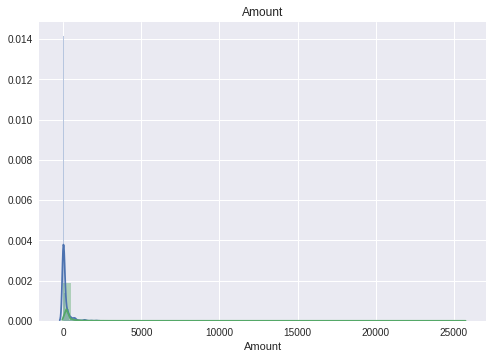

In [96]:
import seaborn as sns
pl.title('Amount')
sns.distplot(df.Amount[df.Class == 1])
sns.distplot(df.Amount[df.Class== 0])
pl.show()

In [97]:
features = ['V14', 'V12', 'V16', 'V17', 'V11', 'V18', 'V13', 'Class']
truncated = df[features]

In [98]:
print(truncated.tail())

             V14       V12       V16       V17       V11       V18       V13  \
284802  4.626942  2.711941  1.107641  1.991691 -1.593105  0.510632 -0.689256   
284803 -0.675143  0.915802 -0.711757 -0.025693 -0.150189 -1.221179  1.214756   
284804 -0.510602  0.063119  0.140716  0.313502  0.411614  0.395652 -0.183699   
284805  0.449624 -0.962886 -0.608577  0.509928 -1.933849  1.113981 -1.042082   
284806 -0.084316 -0.031513 -0.302620 -0.660377 -1.040458  0.167430 -0.188093   

        Class  
284802      0  
284803      0  
284804      0  
284805      0  
284806      0  


In [99]:
truncated.groupby(df.Class).apply(len)

Class
0    284315
1       492
dtype: int64

In [69]:
deci = ensemble.RandomForestClassifier()
deci.fit(truncated[features], truncated.Class)
pd.crosstab(truncated.Class, deci.predict(truncated[features]))

col_0,0,1
Class,,
0,284315,0
1,0,492


In [100]:
positive = truncated[truncated.Class==1]
negative = truncated[truncated.Class==0]
test_set = pd.concat((positive.iloc[::2, :], negative.iloc[::2, :]), axis=0)
train_set = pd.concat((positive.iloc[1::2, :], negative.iloc[1::2, :]), axis=0)

In [101]:
print(test_set.groupby(df.Class).apply(len))
print(train_set.groupby(df.Class).apply(len))

Class
0    142158
1       246
dtype: int64
Class
0    142157
1       246
dtype: int64


In [102]:
print(test_set.tail())

             V14       V12       V16       V17       V11       V18       V13  \
284798  1.122674 -0.453235 -1.431897  0.939328 -1.109232 -0.002373 -1.046946   
284800  0.626211  0.559047  0.225361 -0.605252  0.523316 -0.163049 -0.834660   
284802  4.626942  2.711941  1.107641  1.991691 -1.593105  0.510632 -0.689256   
284804 -0.510602  0.063119  0.140716  0.313502  0.411614  0.395652 -0.183699   
284806 -0.084316 -0.031513 -0.302620 -0.660377 -1.040458  0.167430 -0.188093   

        Class  
284798      0  
284800      0  
284802      0  
284804      0  
284806      0  


In [103]:
def train_and_test_with(mlfunc_list):
    for func, name in mlfunc_list:
        func.fit(train_set[features], train_set.Class)
        print(name+'\n', pd.crosstab(test_set.Class, func.predict(test_set[features])), '\n')

In [104]:
from sklearn import svm
from sklearn import tree
train_and_test_with([(ensemble.RandomForestClassifier(), 'random forest'), (ensemble.AdaBoostClassifier(), 'adaptive boosting')])
train_and_test_with([(tree.DecisionTreeClassifier(), 'decision tree')])

random forest
 col_0       0    1
Class             
0      142158    0
1           0  246 



adaptive boosting
 col_0       0    1
Class             
0      142158    0
1           0  246 

decision tree
 col_0       0    1
Class             
0      142158    0
1           0  246 



In [107]:
from sklearn import naive_bayes
train_and_test_with([(naive_bayes.BernoulliNB(), 'naive bayes')])

naive bayes
 col_0       0    1
Class             
0      142158    0
1           1  245 

